<a href="https://colab.research.google.com/github/coder160/cuadernos/blob/main/Vision_Artificial/Diffusers/TEXT_2_IMAGEipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bienvenido.**

Guía rápida de cómo crear imágenes a partir de un texto, con Inteligencia Artificial.

1.  **Instalar** las dependencias necesarias.
>*Para esto deberá dar click en reproducir a la celda con el título 'Reproducir Dependencias'*

2.  **Seleccionar** modelos transformadores.
>*Deberá seleccionar de la lista disponible un modelo para procesar sus imágenes*

3.  **Ingresar** prompt de la imagen que de sea crear así como un estilo.
>*Algunos Prompts de ejemplo pueden ser: 'Un astronauta con turbante'. Su estilo deberá seleccionarlo de la lista disponible*

*  *Opcionalmente puedes previsualizar tu imagen generada en la celda posterior.*


### **Generar Imágenes a partir de un texto (text2img)**

Para aplicar la inteligencia artificial en la creación de imágenes artificiales, haremos uso del lenguaje de programación [Python](https://www.python.org/), y de la librería [Diffusers](https://huggingface.co/docs/diffusers/index) proporcionada por [HuggingFace](https://huggingface.co/).

Para esta práctica también haremos uso de las herramientas:


*  [Colab](https://colab.research.google.com/?hl=es)- Proporcionada por Google
*  [PipeLine](https://aiencorto.blogspot.com/2023/10/pipelines-para-inferencia-con-modelos.html)
*  [PyTorch]()
*  [MatPlotLib]()
*  

Los **Modelos** Utilizados para la generación de Imágenes serán:

*  [runwayml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5)
*  [stabilityai/stable-diffusion-2-1](https://huggingface.co/stabilityai/stable-diffusion-2-1)
*  [stabilityai/stable-diffusion-xl-base-1.0](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0)
*  [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)
*  [prompthero/openjourney](https://huggingface.co/prompthero/openjourney)

Incluímos las siguientes referencias donde profundizamos mas en los conceptos así como las fuentes oficiales de la información relacionada.

Referencias:

*  **Python** -
*  **Diffusers** -
*  **HuggingFace** -
*  **Google Colab** -
*  **OpenSource** -  https://opensource.com/

Agradecemos mucho por su tiempo.

>Seamos conscientes de la tecnología que tenemos.
>
>Usemos la tecnología para el bienestar.

In [ ]:
# @title **Instalar Dependencias**
from google.colab import output
try:
    !pip install diffusers["torch"] transformers
    !pip install Pillow
    output.clear()
except Exception as e:
    print(e)
finally:
    import torch
    from diffusers import DiffusionPipeline
    from PIL import Image
    from IPython.display import Image
    print('Librerias Cargadas')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Librerias Cargadas


In [ ]:
# @title **Selecionar Modelo**
modelo = "stabilityai/stable-diffusion-xl-base-1.0" # @param ["runwayml/stable-diffusion-v1-5","stabilityai/stable-diffusion-2-1","stabilityai/stable-diffusion-xl-base-1.0","CompVis/stable-diffusion-v1-4","prompthero/openjourney"]
try:
    if modelo == "":
        raise Exception("Por favor, ingrese un modelo válido")
    else:
        pipe = DiffusionPipeline.from_pretrained(
          modelo,
          torch_dtype=torch.float16
          )
        pipe = pipe.to("cuda")
        output.clear()
except Exception as e:
    print(e)
finally:
    print("Modelo descargado e instalado correctamente")

Modelo descargado e instalado correctamente


Imagen creada correctamente: ./ai.png


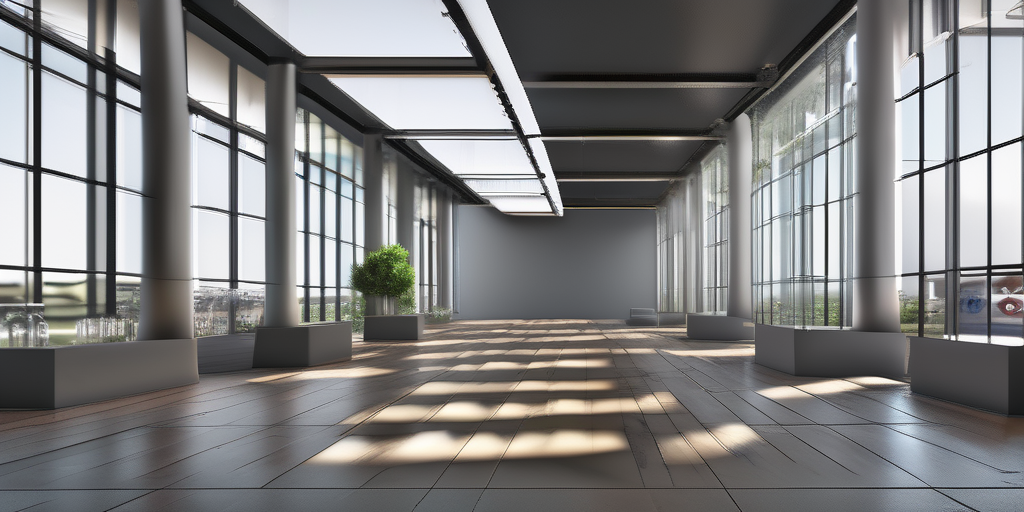

Prompt utilizado:
'RS, Really Simple Syndication, (Sindicación Realmente Simple)., in dynamics style, high dynamic range, hyper realistic, highly detailed, 8K, intense close, uhd image'


  0%|          | 0/110 [00:00<?, ?it/s]

In [ ]:
# @title **Ingresar Prompt**
# @markdown Configuración Básica
nombre_imagen = "rss" # @param {type:"string"}
prompt = "RS, Really Simple Syndication, (Sindicaci\xF3n Realmente Simple)." # @param {type:"string"}
estilo = "FULL-HD" # @param ["DEFAULT","ANIME","SIN_CITIES", "FULL-HD"]

# @markdown Configuración Avanzada
num_inference_steps = 110 # @param {type:"slider", max:200, min:1, step:1}
height = 512 # @param [256,512,1024] {type:"raw"}
width  = 1024 # @param [256,512,1024] {type:"raw"}
guidance_scale = 9.5 # @param {type:"slider", max:10, min:1, step:0.1}


try:
    if prompt == "":
        raise Exception("Ingrese Prompt para su imagen")
    if estilo == "":
        raise Exception("Ingrese Estilo para su imagen")
    else:
        if estilo.upper() == "ANIME":
            style = ", anime style, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition, trending on ArtStation, 4k --ar 1:2 --quality 2"
        if estilo.upper() == "SIN_CITIES":
            style = ", in highly detailed portrait style, by Dustin Nguyen, Akihiko Yoshida, Greg Tocchini, Greg Rutkowski, Cliff Chiang, 4k resolution, Dishonored inspired, bravely default inspired, vibrant but dreary red, black and white color scheme!!!, epic extreme long shot, dark mood and strong backlighting, volumetric lights, smoke volutes, artstation HQ, unreal engine, octane renderer, HQ, 8K"
        if estilo.upper() == "FULL-HD":
            style = ", in dynamics style, high dynamic range, hyper realistic, highly detailed, 8K, intense close, uhd image"
        if estilo.upper() == "DEFAULT":
            style = "."
    if nombre_imagen == "":
        raise Exception("Ingrese un nombre para su imagen")
    full_prompt = prompt+style
    print("Procesando Imagen...")
    image = pipe(full_prompt,
                 num_inference_steps = num_inference_steps,
                 height = height,
                 width = width,
                 guidance_scale = guidance_scale).images[0]
    image.save(f"./{nombre_imagen}.png")
    output.clear()
    print(f"Imagen creada correctamente: ./{nombre_imagen}.png")
    pil_img = Image(filename=f"./{nombre_imagen}.png")
    display(pil_img)
    print(f"Prompt utilizado:\n'{full_prompt}'")
except Exception as e:
    print(e)
image = pipe(full_prompt,
                 num_inference_steps = num_inference_steps,
                 height = height,
                 width = width,
                 guidance_scale = guidance_scale).images[0]


Prompt utilizado:
'a photo of an astronaut riding a horse on mars, anime style, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition, trending on ArtStation, 4k --ar 1:2 --quality 2'


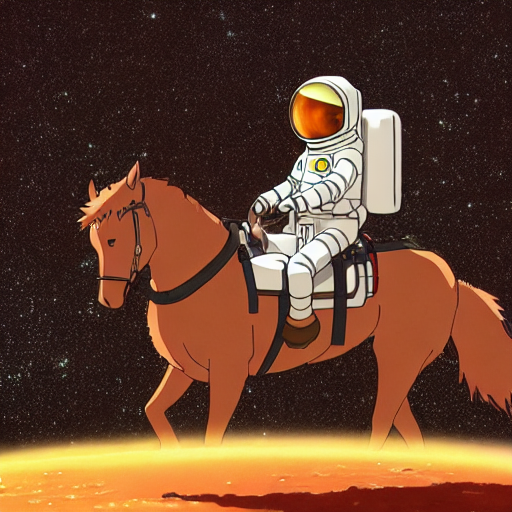

In [ ]:
# @title **Visualizar Imagen**
try:
    print(f"Prompt utilizado:\n'{full_prompt}'")
    pil_img = Image(filename=f"./{nombre_imagen}.png")
    display(pil_img)
except Exception as e:
    print(e)